# Telco Customer Churn

<p style="font-size:110%;"> Telekomünikasyon Müşteri Kaybı veri setini inceleyelim.<br>
   Amacımız müşteri kaybını etkileyen ana faktörleri bulmak. </p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
import matplotlib.ticker as mtick
from scipy.stats import chisquare
from matplotlib.ticker import PercentFormatter
import seaborn as sns

color = ["DarkBlue", "Red"]
sns.set_palette(color)
sns.set(font="Verdana")
title_style = {'family': 'Verdana', 'color': 'darkred', 'size': 16 }
axis_style  = {'family': 'Verdana', 'color': 'darkblue', 'size': 13 }

import warnings
warnings.filterwarnings('ignore')

In [2]:
customer = pd.read_csv("Telco_Customer_Churn.csv",  delimiter=',')
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
customer.shape

(7043, 21)

<p style="font-size:110%;"> -Gördüğümüz gibi elimizde 21 sütuna sahip 7043 satırlık bir veri seti bulunmaktadır. Şimdi sütunlarla bir inceleme yapalım. </p>

In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<ul style="list-style-type:square;"> 
    <li><b>customerID</b>:Müşterilerin sahip olduğu Idler </li>
    <li><b>gender</b>:Müşteri cinsiyetleri (Female-Male) </li>
    <li><b>SeniorCitizen</b>:Müşteri yaşları (65 yaş üstü veya altı) </li> 
    <li><b>Partner</b>:Medeni durumları </li>
    <li><b>Dependents</b>:Müşteriler ile yaşayan çocuk, aile veya torunları </li>
    <li><b>tenure</b>:Firmada kaldıkları ay sayısı </li>
    <li><b>PhoneService</b>:Telefon servisine sahip olup olmadıkları(Yes, No) </li>
    <li><b>MultipleLines</b>:Birden fazla hata sahip olma durumları(Yes,No,No Phone Service)</li>
    <li><b>InternetSevice</b>:İnter servis sağlayıcısı(DSL,Fiber optic, No)</li>
    <li><b>OnlineSecurity</b>:Çevrimiçi güvenlik servisi alma durumları (Yes,No,No Internet Service)</li>
    <li><b>OnlineBackup</b>:Çevrimiçi yedekleme servisi alma durumları (Yes,No,No Internet Service)</li>
    <li><b>DeviceProtection</b>:(Yes,No,No Internet Service)</li>
    <li><b>TechSupport</b>:Teknik destek servisi (Yes,No,No Internet Service)</li>
    <li><b>StreamingTV</b>:TV kanal paketi (Yes,No,No Internet Service)</li>
    <li><b>StreamingMovies</b>:Film kanal paketi (Yes,No,No Internet Service)</li>
    <li><b>Contract</b>: Sözleşme türü</li>
    <li><b>PaperlessBilling</b>: Online faturlama sistemi kullandıkları </li>
    <li><b>PaymentMethod</b>: Ödeme yöntemleri </li>
    <li><b>MonthlyCharges</b>: Aylık ücreti </li>
    <li><b>TotalCharges</b>:Toplam ücretleri 
    <li><b>Churn</b>: Ayrılma durumları verilmiştir.</li>
</ul>

<ul style="list-style-type:none;">
  <li>7043 tane tek(eşsiz) müşteri id'sine sahibiz. Müşteri bilgileri arasında çift bilgiler bulunmamaktadır.</li>
  <li> Sayısal değer olması gereken toplam öedeme özelliğimiz ise nesne şeklindedir.</li>
</ul>

In [5]:
customer.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [6]:
print('Unique values of Internet Service :' , customer.InternetService.unique())
print('Unique values of Contract :' , customer.Contract.unique())
print('Unique values of PaperlessBilling :' , customer.PaperlessBilling.unique())
print('Unique values of PaymentMethod :', customer.PaymentMethod.unique())

Unique values of Internet Service : ['DSL' 'Fiber optic' 'No']
Unique values of Contract : ['Month-to-month' 'One year' 'Two year']
Unique values of PaperlessBilling : ['Yes' 'No']
Unique values of PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


<p>Sözleşme türü 3 tane değişken almış ve bunlar 'Aydan aya', '1 yıllık' ve '2 yıllık' zamanlarda yenileniyorlar.<br>
    Ödeme türünde 'Elektronik kontrol', 'Mail ile kontrol', 'Banka havalesi (otomatik)' ve 'Kredi kartı (otomatik)' şeklinde 4 değer bulunuyor.</p>

In [7]:
customer.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<p>Çevrimiçi güvenlik,yedekleme, ürün koruması, teknik destek, Tv ve film aboneliği servislerinden yararlanılması için internet servisi olması gerektiğini görüyoruz. Bu sebeple internet servisine sahip olmayan müşterilerin bu özelliklere sahip olmadığını varsayalım.</p>

In [8]:
replacement = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies']
for colName in replacement:
    customer[colName] = customer[colName].replace({'No internet service' : 'No'})

In [9]:
customer['SeniorCitizen'] = customer['SeniorCitizen'].replace({ 0:'Young', 1:'Old'})
customer = customer.drop('customerID', axis=1)

<p> CustomerID özelliğimiz müşterilerin ayrılma durumu hakkında bize bilgi vermediği için o sütunu silelim.</p>

In [10]:
customer.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,Young,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,Young,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,Young,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,Young,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,Young,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<h2>Boş Değerlerin Tespiti ve Sayısal Değerlerin İncelenmesi</h2>

Boş olan değerlerin kontrolünü yapalım. TotalCharges özelliğine baktığımızda nesne olduğunu gördük bu nedenle önce numerik değerlere çeviriyoruz ve Toplam/Total Ödemeler özelliğimizde 11 verimizin boş olduğunu görüyoruz. Bu tüm müşteri verilerimizin yaklaşık yüzde 0.16'sına denk gelmektedir.

In [11]:
customer.TotalCharges = pd.to_numeric(customer.TotalCharges,  errors='coerce')

pd.concat([customer.isnull().sum(), 100*customer.isnull().sum()/len(customer)], axis=1).rename(columns ={0:'Number of Missing Records', 1:'Percentage(%)'})

,Number of Missing Records,Percentage(%)
gender,0,0.000000
SeniorCitizen,0,0.000000
Partner,0,0.000000
Dependents,0,0.000000
tenure,0,0.000000
PhoneService,0,0.000000
MultipleLines,0,0.000000
InternetService,0,0.000000
OnlineSecurity,0,0.000000
OnlineBackup,0,0.000000


<p>Boş verilerle ilgili yaklaşımdan önce toplam ödemenin aylık ödeme ve müşterilerin aylık kullanımı arasındaki ilişkiden bahsetmek istiyorum.<br>
    Toplam Ödeme = (müşterilerin firmada kaldıkları ay sayısı)x(aylık ödeme) <br>
 İlk 3 veriyle bu formulü inceleyelim.<br>
     - Birinci müşterimiz için Toplam Ödeme miktarı 1*29.85=29.85 dolar şeklindedir.<br>
     - Ikinci müşterimiz de ise toplam ödeme 34*56.950=1936.3 dolar olmaktadır. Ancak vergi oranları veya aldığı servisler nedeniyle bir indirime sahip olduğunu varsayabiliriz.<br>
     - Son olaran üçüncü müşteri 2*53.85=107.7$ ödemesi gerekirken 2. müşteri ile benzer sebeplerle bir miktar daha fazla ödeme yapmıştır.</p>

In [12]:
customer[['gender','tenure','MonthlyCharges','TotalCharges','Churn']].head(8)

,gender,tenure,MonthlyCharges,TotalCharges,Churn
0,Female,1,29.85,29.85,No
1,Male,34,56.95,1889.50,No
2,Male,2,53.85,108.15,Yes
3,Male,45,42.30,1840.75,No
4,Female,2,70.70,151.65,Yes
5,Female,8,99.65,820.50,Yes
6,Male,22,89.10,1949.40,No
7,Female,10,29.75,301.90,No


<p> Yukarıda yaptığımız açıklamalar doğrultusunda ve boş verilerimiz az olduğu için inceleme kararı aldım. Sonuçta toplam ödeme özelliği boş olan müşterilerimizin henüz kullanım aylarını doldurmadıklarını görüyoruz. Bu durumda yukarda sözünü ettiğimiz formulün sonucunda bu müşterilerimizin toplam ödeme özelliklerini 0 olarak varsaymak daha mantıklı olacaktır. Ayrıca 11 müşterimizde daha yeni katıldıkları için ayrılma kararı verecek süreci yaşamamışlardır. Bizim amacımız ayrılma kararının gerçekleşmesi üzerine olduğu için bu müşteri verilerini silelim. </p>

In [13]:
customer[customer.TotalCharges.isnull()][['gender','SeniorCitizen','tenure','MonthlyCharges','TotalCharges','Churn']]

,gender,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
488,Female,Young,0,52.55,NaN,No
753,Male,Young,0,20.25,NaN,No
936,Female,Young,0,80.85,NaN,No
1082,Male,Young,0,25.75,NaN,No
1340,Female,Young,0,56.05,NaN,No
3331,Male,Young,0,19.85,NaN,No
3826,Male,Young,0,25.35,NaN,No
4380,Female,Young,0,20.00,NaN,No
5218,Male,Young,0,19.70,NaN,No
6670,Female,Young,0,73.35,NaN,No


In [14]:
customer.dropna(inplace = True)
customer = customer.reset_index(drop=True)

In [15]:
customer.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


<h2>Aykırı Verilerin İncelenmesi</h2>

<p> Toplam ödeme özelligimize baktımızda kutu grafiğinde herhangi bir aykırı değer görünmüyor. Ancak standart olan eşik değerini (whisker) 1.5dan 1.0 e düşürdüğümüzde bazı verilerimizin aykırılık gösterdiğini söyleyebiliriz.</p>

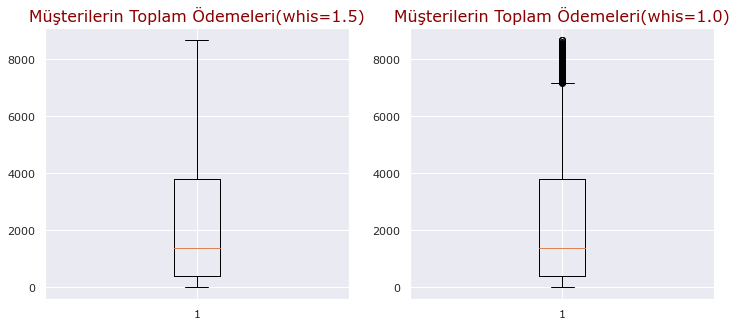

In [16]:
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.boxplot(customer.TotalCharges)
plt.title("Müşterilerin Toplam Ödemeleri(whis=1.5)", fontdict=title_style)

plt.subplot(122)
plt.boxplot(customer.TotalCharges, whis=1.0)
plt.title("Müşterilerin Toplam Ödemeleri(whis=1.0)", fontdict=title_style)

plt.show()

<p>Çeyrekler açıklığı yaklaşımı(Tukey Metot) ile baktığımızda eşik değerimiz (whisker) 1.0 iken 272 aykırı değerimiz vardır.<br>Bu aykırı değerleri limitleyelim (winsorize işlemi). </p>

In [17]:
q75, q25 = np.percentile(customer["TotalCharges"].dropna(), [75 ,25])
IQR = q75 - q25
threshold_values=[]
for threshold_value in np.arange(1,5,0.5):
    min_value = q25 - (IQR*threshold_value)
    max_value = q75 + (IQR*threshold_value)
    outlier_value_number = len((np.where((customer["TotalCharges"].dropna() > max_value)| (customer["TotalCharges"].dropna() < min_value))[0]))
    threshold_values.append({'threshold_value': threshold_value,'outlier_value_number': outlier_value_number})
pd.DataFrame(threshold_values)

,threshold_value,outlier_value_number
0,1.0,272
1,1.5,0
2,2.0,0
3,2.5,0
4,3.0,0
5,3.5,0
6,4.0,0
7,4.5,0


In [18]:
winsorize_totalcharges = winsorize(customer["TotalCharges"], (0.10, 0.10))
winsorize_totalcharges

masked_array(data=[  84.6 , 1889.5 ,  108.15, ...,  346.45,  306.6 ,
                   5976.9 ],
             mask=False,
       fill_value=1e+20)

<p>Limitleme/Winsorize işlemi ile toplam ödemlerimiz iki yölü olarak sınırlandırılmıştır. Minimum sınırımız 84 iken maksimum sınırımız 6000 olmuştur. </p>

In [19]:
np.percentile(customer.TotalCharges.dropna(),[10,90])

array([  84.6 , 5976.64])

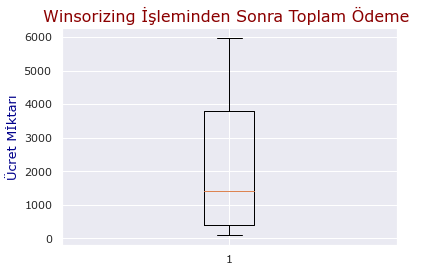

In [20]:
plt.boxplot(winsorize_totalcharges)
plt.title("Winsorizing İşleminden Sonra Toplam Ödeme ", fontdict=title_style)
plt.ylabel("Ücret Mİktarı", fontdict=axis_style)
plt.show()

<h2>Veri Özelliklerinin İncelenmesi</h2>

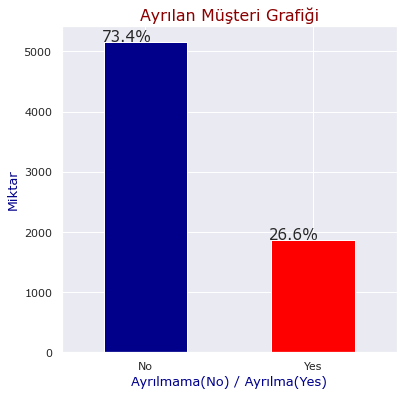

In [21]:
ax = customer['Churn'].value_counts().plot(kind='bar', color =color, figsize=(6, 6))
plt.title("Ayrılan Müşteri Grafiği", fontdict=title_style)
plt.xlabel('Ayrılmama(No) / Ayrılma(Yes)', fontdict=axis_style)
plt.ylabel('Miktar', fontdict=axis_style)
plt.xticks(rotation = 0)

totals = []

for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x() - .01, i.get_height() + .5, \
            str(round((i.get_height()/total)*100, 1))+'%', fontsize=15)
    
plt.show()

<p style="font-size:120%;"> Grafiğimizi incelediğimizde cayan müşterilerin neredeyse 2.5 katından fazlası hizmetleri kullanmaya devam etme kararı vermiş.<br> Peki ayrılma kararlarını etkileyen faktörler neler: yaş unsuru, ödemeler, alınan servisler ve ya ödeme türü mü?</p>

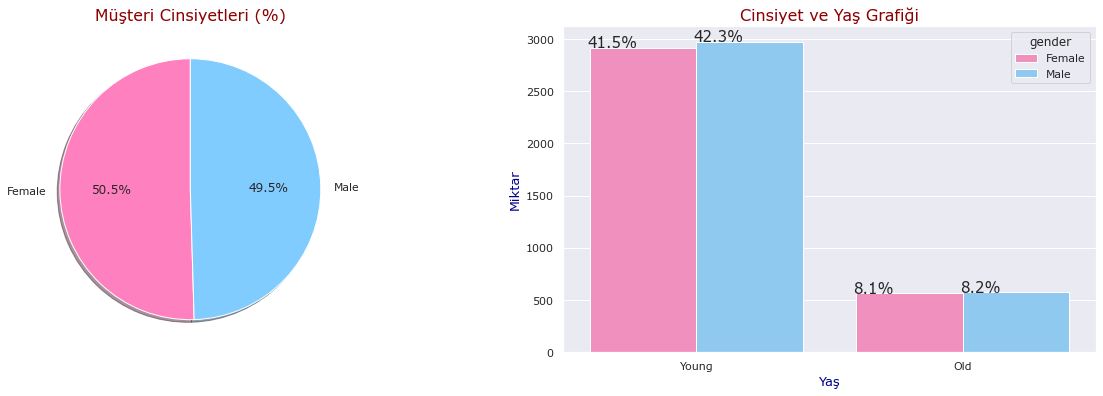

In [22]:
plt.figure(figsize=(21, 6))
plt.subplot(1,2,1)
plt.title('Müşteri Cinsiyetleri (%)',fontdict=title_style)
plt.pie(customer['gender'].value_counts(), labels=customer.gender.unique(), autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['#ff80bf','#80ccff'])

plt.subplot(1,2,2)
plt.title('Cinsiyet ve Yaş Grafiği', fontdict=title_style)
ax = sns.countplot(x='SeniorCitizen', hue='gender', data=customer, palette=['#ff80bf','#80ccff'])
plt.xlabel('Yaş', fontdict=axis_style)
plt.ylabel('Miktar', fontdict=axis_style)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x() - .01, i.get_height() + .5, \
            str(round((i.get_height()/total)*100, 1))+'%', fontsize=15)

plt.show()

<p>Müşteri verilerimizin %50.5 luk kısmı kadınlardan oluşurken %49.5 kısmı erkeklerden oluşmaktadır. Cinsiyet verileri dengeli dağılmış durumdadır.Ayrıca yaşlı ve genç nufüs içinde kadın-erkek oranı birbirine yakındır.  </p>

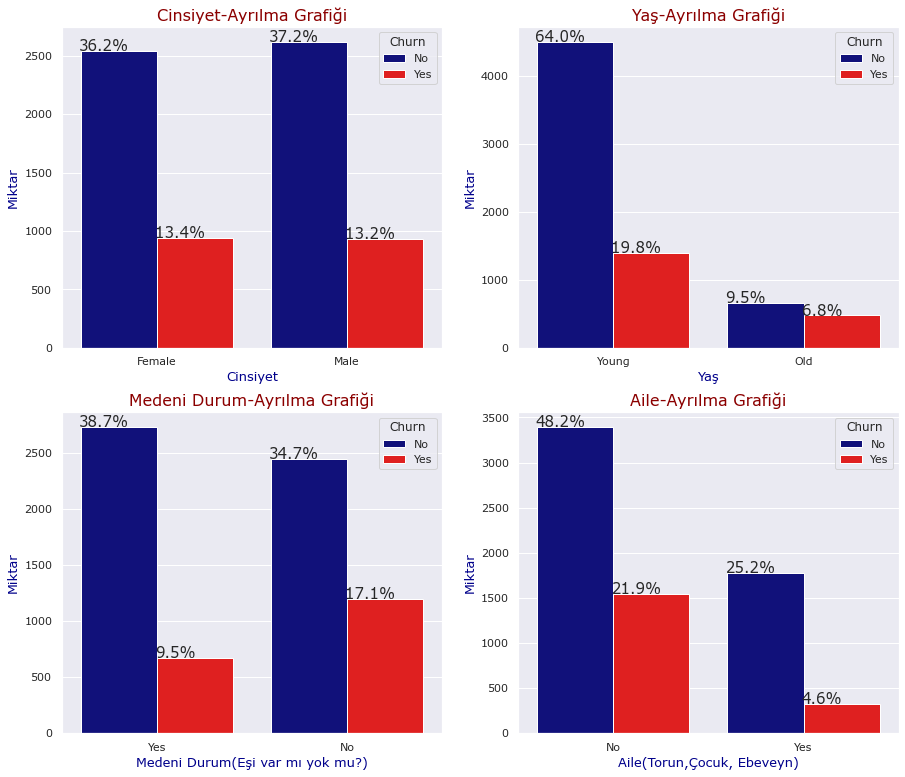

In [23]:
plt.figure(figsize=(15, 13))
plt.subplot(221)
plt.title('Cinsiyet-Ayrılma Grafiği', fontdict=title_style)
ax = sns.countplot(x='gender', data=customer, hue='Churn', palette=color)
plt.xlabel('Cinsiyet', fontdict=axis_style)
plt.ylabel('Miktar', fontdict=axis_style)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x() - .01, i.get_height() + .5, \
            str(round((i.get_height()/total)*100, 1))+'%', fontsize=15)

plt.subplot(222)
plt.title('Yaş-Ayrılma Grafiği', fontdict=title_style)
ax=sns.countplot(x='SeniorCitizen', data=customer, hue='Churn', palette=color)
plt.xlabel('Yaş', fontdict=axis_style)
plt.ylabel('Miktar', fontdict=axis_style)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x() - .01, i.get_height() + .5, \
            str(round((i.get_height()/total)*100, 1))+'%', fontsize=15)

plt.subplot(223)
plt.title('Medeni Durum-Ayrılma Grafiği', fontdict=title_style)
ax =sns.countplot(x='Partner', data=customer, hue='Churn', palette=color)
plt.xlabel('Medeni Durum(Eşi var mı yok mu?)', fontdict=axis_style)
plt.ylabel('Miktar', fontdict=axis_style)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x() - .01, i.get_height() + .5, \
            str(round((i.get_height()/total)*100, 1)) +'%', fontsize=15)

plt.subplot(224)
plt.title('Aile-Ayrılma Grafiği', fontdict=title_style)
ax=sns.countplot(x='Dependents', data=customer, hue='Churn', palette=color)
plt.xlabel('Aile(Torun,Çocuk, Ebeveyn)', fontdict=axis_style)
plt.ylabel('Miktar', fontdict=axis_style)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x() - .01, i.get_height() + .5, \
            str(round((i.get_height()/total)*100, 1))+'%', fontsize=15)
    
plt.show()

<p>Grafikleri ve aşağıdaki tabloları incelediğimizde kadın ve erkek müşterilerin ayrılma oranları birbirine çok yakın.<br>
 Genç olan kesimin yaşlı kesime göre daha yüksek ayrılma oranına sahip.<br>
 Eşi olmayan müşteriler ve evinde çocuk,torun,ebeveyn gibi beraber yaşadığı kişiler olmayan müşterilerin ayrılma oranları oldukça yüksektir.</p>  

In [24]:
for i in ['gender', 'SeniorCitizen', 'Partner', 'Dependents']:
    cont_table = pd.crosstab(index=customer['Churn'],columns=customer[i])
    display(cont_table)

gender,Female,Male
Churn,,
No,2544,2619
Yes,939,930


SeniorCitizen,Old,Young
Churn,,
No,666,4497
Yes,476,1393


Partner,No,Yes
Churn,,
No,2439,2724
Yes,1200,669


Dependents,No,Yes
Churn,,
No,3390,1773
Yes,1543,326


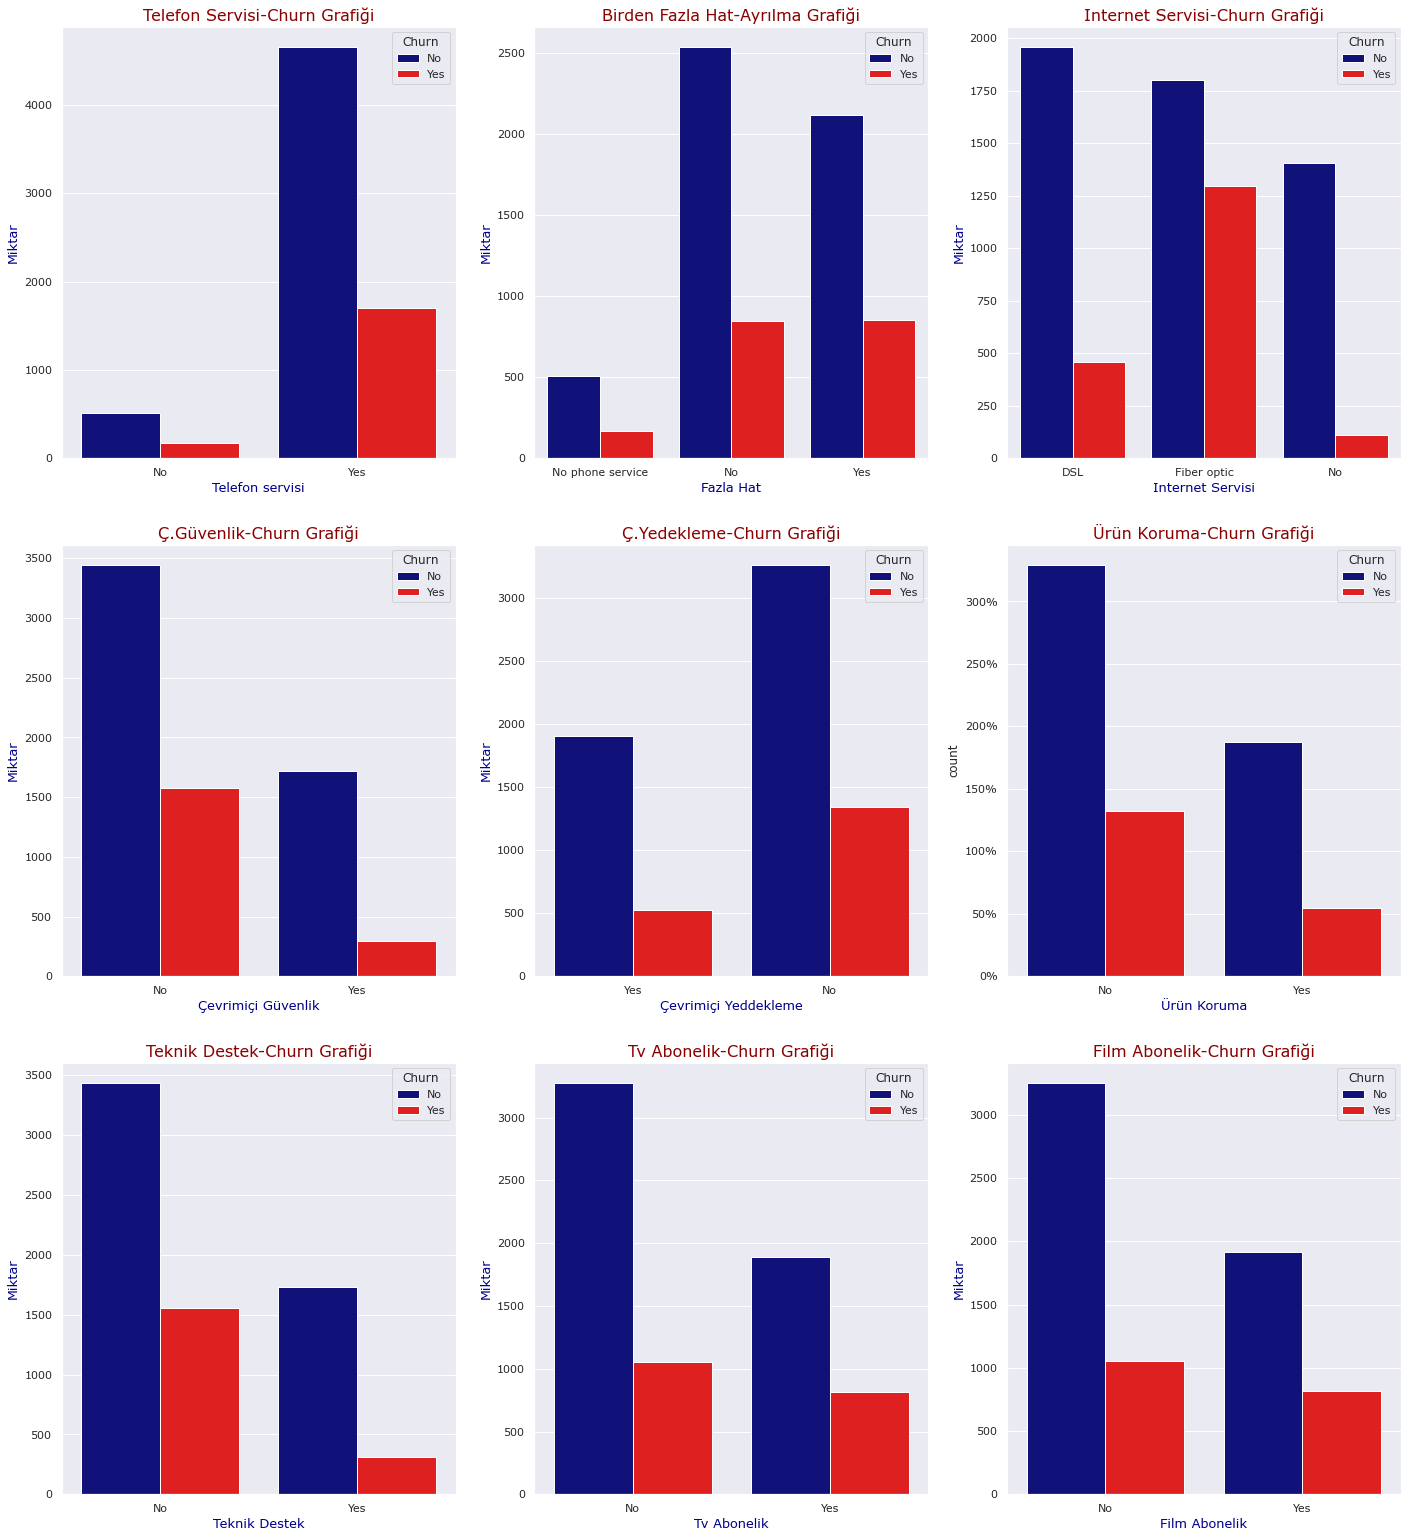

In [25]:
plt.figure(figsize=(24, 27))

plt.subplot(331)
plt.title('Telefon Servisi-Churn Grafiği', fontdict=title_style)
sns.countplot(x='PhoneService', data=customer, hue='Churn', palette=color)
plt.xlabel('Telefon servisi', fontdict=axis_style)
plt.ylabel('Miktar', fontdict=axis_style)

plt.subplot(332)
plt.title('Birden Fazla Hat-Ayrılma Grafiği', fontdict=title_style)
sns.countplot(x='MultipleLines', data=customer, hue='Churn', palette=color)
plt.xlabel('Fazla Hat', fontdict=axis_style)
plt.ylabel('Miktar', fontdict=axis_style)

plt.subplot(333)
plt.title('Internet Servisi-Churn Grafiği', fontdict=title_style)
sns.countplot(x='InternetService', data=customer, hue='Churn', palette=color)
plt.xlabel('Internet Servisi', fontdict=axis_style)
plt.ylabel('Miktar', fontdict=axis_style)

plt.subplot(334)
plt.title('Ç.Güvenlik-Churn Grafiği', fontdict=title_style)
sns.countplot(x='OnlineSecurity', data=customer, hue='Churn', palette=color)
plt.xlabel('Çevrimiçi Güvenlik', fontdict=axis_style)
plt.ylabel('Miktar', fontdict=axis_style)

plt.subplot(335)
plt.title('Ç.Yedekleme-Churn Grafiği', fontdict=title_style)
sns.countplot(x='OnlineBackup', data=customer, hue='Churn', palette=color)
plt.xlabel('Çevrimiçi Yeddekleme', fontdict=axis_style)
plt.ylabel('Miktar', fontdict=axis_style)

plt.subplot(336)
plt.title('Ürün Koruma-Churn Grafiği', fontdict=title_style)
ax = sns.countplot(x='DeviceProtection', data=customer, hue='Churn', palette=color)
plt.xlabel('Ürün Koruma', fontdict=axis_style)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1000, decimals=None, symbol='%', is_latex=False))
#plt.ylabel('Miktar', fontdict=axis_style)

plt.subplot(337)
plt.title('Teknik Destek-Churn Grafiği', fontdict=title_style)
sns.countplot(x='TechSupport', data=customer, hue='Churn', palette=color)
plt.xlabel('Teknik Destek', fontdict=axis_style)
plt.ylabel('Miktar', fontdict=axis_style)

plt.subplot(338)
plt.title('Tv Abonelik-Churn Grafiği', fontdict=title_style)
sns.countplot(x='StreamingTV', data=customer, hue='Churn', palette=color)
plt.xlabel('Tv Abonelik', fontdict=axis_style)
plt.ylabel('Miktar', fontdict=axis_style)

plt.subplot(339)
plt.title('Film Abonelik-Churn Grafiği', fontdict=title_style)
sns.countplot(x='StreamingMovies', data=customer, hue='Churn', palette=color)
plt.xlabel('Film Abonelik', fontdict=axis_style)
plt.ylabel('Miktar', fontdict=axis_style)

plt.show()

<p> Birden fazla hatta sahip müşterilerin ayrılmaya eğilimli olduğunu görüyoruz.<br>
    Çevrimiçi güvenlik,yedekleme,ürün koruma ve teknik destek servislerini almayan müşterilerin çoğunlukla ayrıldığını söyleyebiriz.<br>
    Tv ve Film aboneliği olan ve olmayan müşterilerin ayrılma oranları birbirine biraz olsun yakın değerlerdedir.
</p>

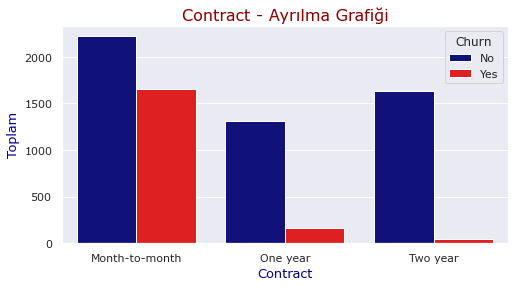

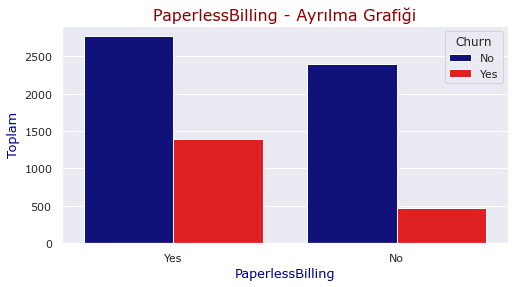

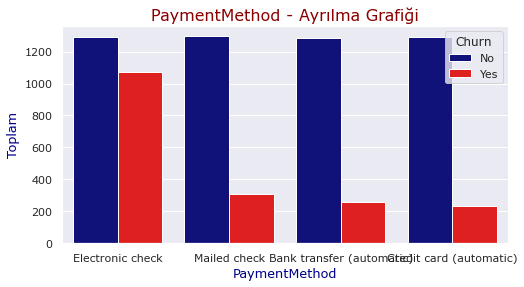

In [26]:
for col in ['Contract', 'PaperlessBilling', 'PaymentMethod']:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue='Churn', data=customer, palette=color)
    plt.title("{} - Ayrılma Grafiği".format(col), fontdict=title_style)
    plt.xlabel("{}".format(col), fontdict=axis_style)
    plt.ylabel('Toplam', fontdict=axis_style)
    plt.show()

<p>Aylık sözleşme yapan müşterilerin Yıllık ve İki yıllık sözleşme yapan müşterilerden daha fazla oranda ayrıldığını görüyoruz.<br>Kağıtsız/Online fatura sistemini ve elektronik ödeme yöntemini seçen müşterilerin ayrılma olasılığı daha yüksektir.<br>
 - Aşağıda yaptığımız incelemede çoğunlukla genç müşterilerin aylık sözleşme ve çevrimiçi faturayı tercih ettiğini söyleyebiliriz. Yaşları gereği mail/posta yolu ile ödemeyi yaşlı kesimin daha fazla gerçekleştireceğini düşünürken tam tersi gençlerin kullandığını görüyoruz.</p>

In [27]:
ay_cont = customer[customer['Contract']=='Month-to-month']
no_paper = customer[customer['PaperlessBilling']=='Yes']
elc_chck = customer[customer['PaymentMethod']=='Electronic check']
mail_chck = customer[customer['PaymentMethod']=='Mailed check']


print('Aylık sözleşme yapan yaş grupları:\n',ay_cont['SeniorCitizen'].value_counts(),sep='')
print('--'*15)
print('Kağıtsız/Çevrimiçi faturayı tercih eden müşteri grupları:\n',no_paper['SeniorCitizen'].value_counts(),sep='')
print('--'*15)
print('Elektronik ödeme yapan müşteri grupları:\n',elc_chck['SeniorCitizen'].value_counts(),sep='')
print('--'*15)
print('Mail yoluyla ödeme yapan müşteri grupları:\n',mail_chck['SeniorCitizen'].value_counts(),sep='')

Aylık sözleşme yapan yaş grupları:
Young    3068
Old       807
Name: SeniorCitizen, dtype: int64
------------------------------
Kağıtsız/Çevrimiçi faturayı tercih eden müşteri grupları:
Young    3292
Old       876
Name: SeniorCitizen, dtype: int64
------------------------------
Elektronik ödeme yapan müşteri grupları:
Young    1771
Old       594
Name: SeniorCitizen, dtype: int64
------------------------------
Mail yoluyla ödeme yapan müşteri grupları:
Young    1510
Old        94
Name: SeniorCitizen, dtype: int64


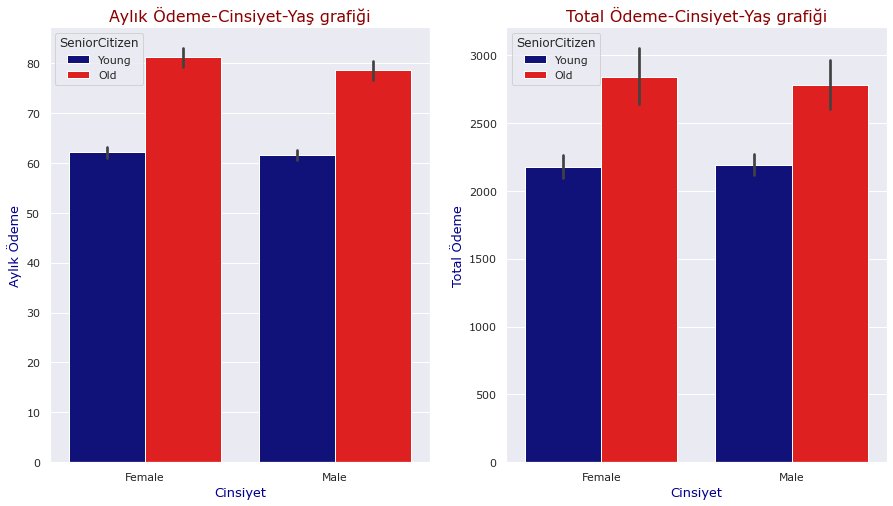

In [28]:
plt.figure(figsize=(15,8))

plt.subplot(121)
sns.barplot(x = 'gender', y='MonthlyCharges', data = customer, hue = 'SeniorCitizen', palette=color)
plt.title("Aylık Ödeme-Cinsiyet-Yaş grafiği", fontdict=title_style)
plt.xlabel('Cinsiyet', fontdict=axis_style)
plt.ylabel('Aylık Ödeme', fontdict=axis_style)

plt.subplot(122)
sns.barplot(x = 'gender', y = 'TotalCharges', data = customer, hue='SeniorCitizen', palette=color)
plt.title("Total Ödeme-Cinsiyet-Yaş grafiği", fontdict=title_style)
plt.xlabel('Cinsiyet', fontdict=axis_style)
plt.ylabel('Total Ödeme', fontdict=axis_style)
plt.xticks()


plt.show()

<p> Yaşlı kadın müşterilerin aylık ödemelerinin yaşlı erkek müşterilerden az miktarda yüksek olduğunu söyleyebiliriz.</p>

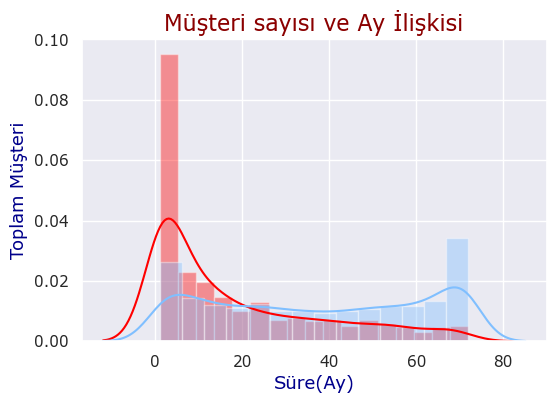

In [29]:
plt.figure(figsize=(6,4), dpi=100)
sns.distplot(customer.tenure[(customer["Churn"] == 'Yes') ], color="Red")
sns.distplot(customer.tenure[(customer["Churn"] == 'No') ], color="#80bfff")
plt.title("Müşteri sayısı ve Ay İlişkisi", fontdict=title_style)
plt.xlabel('Süre(Ay)', fontdict=axis_style)
plt.ylabel('Toplam Müşteri', fontdict=axis_style)
plt.xticks()
plt.show()

<p>Firmada uzun süre bulunan müşterilerin 'Sadık Müşterilerin' ayrılmalarının daha az olduğunu varsayabiliriz.</p>

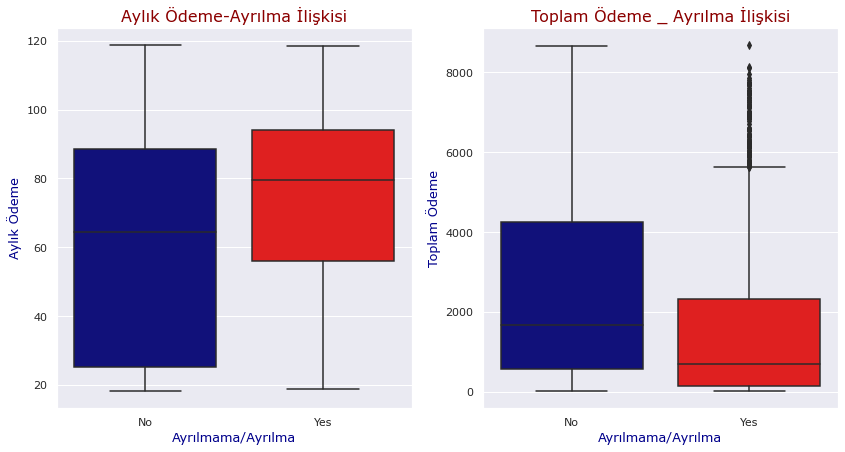

In [30]:
plt.figure(figsize=(14,7))

plt.subplot(121)
sns.boxplot(x="Churn",y="MonthlyCharges",data=customer, palette=color)
plt.title("Aylık Ödeme-Ayrılma İlişkisi", fontdict=title_style)
plt.xlabel('Ayrılmama/Ayrılma', fontdict=axis_style)
plt.ylabel('Aylık Ödeme', fontdict=axis_style)

plt.subplot(122)
sns.boxplot(x="Churn",y="TotalCharges",data=customer, palette=color)
plt.title("Toplam Ödeme _ Ayrılma İlişkisi", fontdict=title_style)
plt.xlabel('Ayrılmama/Ayrılma', fontdict=axis_style)
plt.ylabel('Toplam Ödeme', fontdict=axis_style)

plt.show()

Aylık faturası 60 dolardan fazla olan müşteriler caymaya meyillidir.

<h2>Korelasyon Analizi</h2>

<p>Sayısal (sürekli) verilerimizin arasındaki ilişkiyi inceleyelim.</p>

In [31]:
customer_cr= customer.corr()
customer_cr

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


<p>Korelasyon tablosu ve heatmap grafiğini incelediğmizde:<br>
 -Aylık ödeme ve Toplam ödeme arasındaki korelasyonun yaklaşık 0,65 olduğunu,<br>
 -Firmada kalınan ay sayısı ile toplam ödeme  arasındaki korelasyonun daha yüksek olduğunu görüyoruz.
</p>

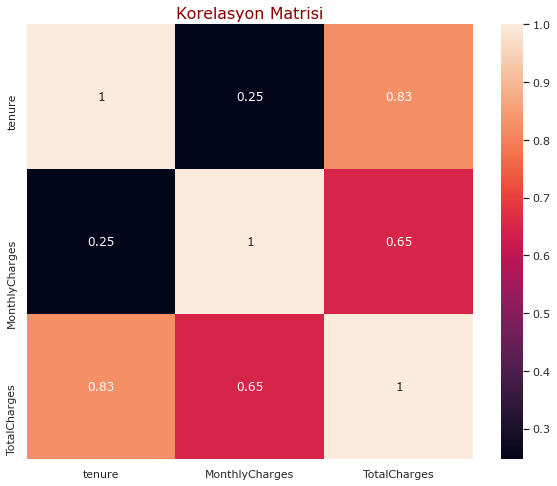

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(customer_cr, annot=True)
plt.title("Korelasyon Matrisi", fontdict=title_style)
plt.show()

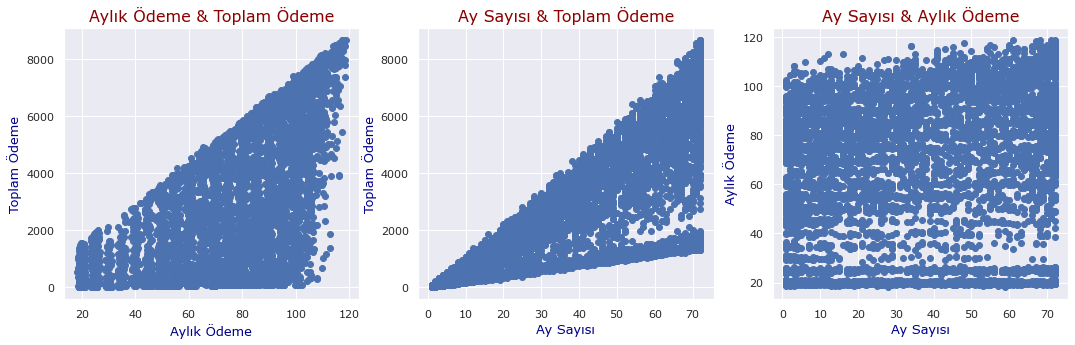

In [33]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(customer["MonthlyCharges"], customer["TotalCharges"])
plt.title("Aylık Ödeme & Toplam Ödeme", fontdict=title_style )
plt.xlabel('Aylık Ödeme', fontdict=axis_style )
plt.ylabel('Toplam Ödeme', fontdict=axis_style )

plt.subplot(1,3,2)
plt.scatter(customer["tenure"], customer["TotalCharges"])
plt.title("Ay Sayısı & Toplam Ödeme", fontdict=title_style )
plt.xlabel('Ay Sayısı', fontdict=axis_style )
plt.ylabel('Toplam Ödeme', fontdict=axis_style )

plt.subplot(1,3,3)
plt.scatter(customer["tenure"], customer["MonthlyCharges"])
plt.title("Ay Sayısı & Aylık Ödeme", fontdict=title_style )
plt.xlabel('Ay Sayısı', fontdict=axis_style )
plt.ylabel('Aylık Ödeme', fontdict=axis_style )

plt.show()

<h2>Ki-kare Testi (Chi square test) </h2>

<p>Kategorik değişkenlerimizin analizini Chi-Square/Ki-Kare testi ile inceleyelim.<br>
 Bunun için yaş ve cinsiyetin diğer bir kaç kategorik değişkenlerimizle ilişkisini &alpha;=0.05 anlamlılık düzeyinde karşılaştıralım. </p>

In [34]:
for col in ["PaymentMethod","PaperlessBilling",'Contract']: 
    cont_table = pd.crosstab(customer[col], customer["SeniorCitizen"])
    print(chisquare(cont_table, axis=None))

Power_divergenceResult(statistic=3530.9397042093287, pvalue=0.0)
Power_divergenceResult(statistic=3448.6598407281, pvalue=0.0)
Power_divergenceResult(statistic=5029.537542662116, pvalue=0.0)


In [36]:
for col in ["MultipleLines","PaymentMethod","PaperlessBilling","DeviceProtection"]: 
    cont_table = pd.crosstab(customer[col], customer["gender"])
    print(chisquare(cont_table, axis=None))

Power_divergenceResult(statistic=1810.3276450511946, pvalue=0.0)
Power_divergenceResult(statistic=284.3663253697383, pvalue=1.3147116314520964e-57)
Power_divergenceResult(statistic=243.127417519909, pvalue=2.005323795352217e-52)
Power_divergenceResult(statistic=686.4971558589306, pvalue=1.7779820170160254e-148)


<p> Yaş ve cinsiyet için yaptığımız test istatistiksel olarak iki farklı kategorik veri grubunun anlamlı olduğunu gösteriyor (bütün p değerleri anlamlılık düzeyimizden oldukça düşükler).<br>
<b>Sonuç olarak özellikler birbiriyle bağlantılıdır.</b><br>
Görsel olarak bu karşılaştırmalardan iki tanesini görelim.</p>

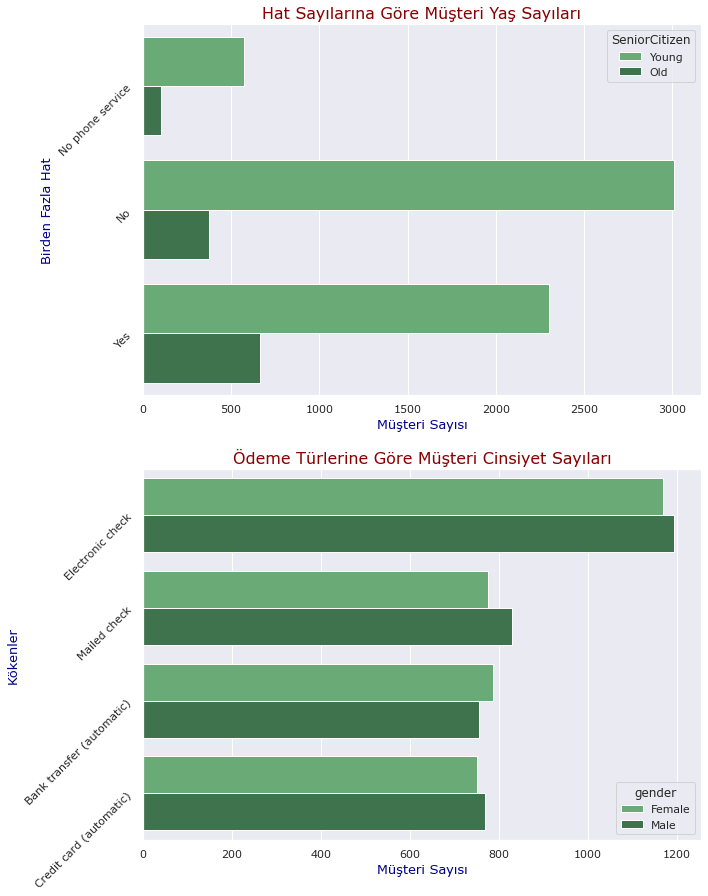

In [37]:
plt.figure(figsize=(10,15))

plt.subplot(2,1,1)
sns.countplot(y="MultipleLines", hue="SeniorCitizen", data=customer, palette="Greens_d")
plt.title("Hat Sayılarına Göre Müşteri Yaş Sayıları", fontdict = title_style)
plt.ylabel("Birden Fazla Hat", fontdict = axis_style)
plt.xlabel("Müşteri Sayısı", fontdict = axis_style)
plt.yticks(rotation=45)

plt.subplot(2,1,2)
sns.countplot(y="PaymentMethod", hue="gender", data=customer, palette="Greens_d")
plt.title("Ödeme Türlerine Göre Müşteri Cinsiyet Sayıları", fontdict = title_style)
plt.ylabel("Kökenler", fontdict = axis_style)
plt.xlabel("Müşteri Sayısı", fontdict = axis_style)
plt.yticks(rotation=45)

plt.show()

In [38]:
df = customer[['PhoneService', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaymentMethod','Churn']]

no_services = df[(df['PhoneService']=='No')  & (df['OnlineSecurity']=='No') & (df['OnlineBackup']=='No') & (df['DeviceProtection']=='No') & (df['TechSupport']=='No') & (df['StreamingTV']=='No') & (df['StreamingMovies']=='No')]
yes_services = df[(df['PhoneService']=='Yes') & (df['OnlineSecurity']=='Yes') & (df['OnlineBackup']=='Yes') & (df['DeviceProtection']=='Yes') & (df['TechSupport']=='Yes') & (df['StreamingTV']=='Yes') & (df['StreamingMovies']=='Yes')]


print('Servisleri alıp ayrılan müşteriler: {:.2f}'.format(len(yes_services[yes_services['Churn']=='Yes'])*100/len(yes_services)))
print('Servisleri almayıp ayrılan müşteriler: {}'.format(len(no_services[no_services['Churn']=='Yes'])*100/len(no_services)))

Servisleri alıp ayrılan müşteriler: 5.79
Servisleri almayıp ayrılan müşteriler: 43.75


<p> Servislerin müşterilerin ayrılması üzerinde yaklaşık %5 etkisi olduğunu görüyoruz, bu durumda servislere sahip olmanın etkisinin ayrılmayı etkilemediğini varsayabiliriz.</p>

In [39]:
df1 = customer[['gender','SeniorCitizen','PaymentMethod','Contract','Churn']]
df2 = df1[df1['Churn']=='Yes']
df2.describe()

,gender,SeniorCitizen,PaymentMethod,Contract,Churn
count,1869,1869,1869,1869,1869
unique,2,2,4,3,1
top,Female,Young,Electronic check,Month-to-month,Yes
freq,939,1393,1071,1655,1869


<p> Cinsiyet, yaş, ödeme türü ve sözleşme türünün ayrılmaya etkisine baktığımızda;<br>
     - Çoğunlukla genç kadınların ayrıldığını görüyoruz. Buna ek olarak aydan aya sözleşme yenileyen ve ödemesini elektronik ortamlarda yapan müşteriler ayrılma eğilimindeler.</p>

In [47]:
d = customer[['gender','SeniorCitizen','Partner','Dependents','MonthlyCharges','TotalCharges','Churn']]
f_yes = d[(d['gender']=='Female') &(d['Partner']=='Yes') & (d['Dependents']=='Yes') & (d['Churn']=='Yes')]
f_no = d[(d['gender']=='Female') &(d['Partner']=='Yes') & (d['Dependents']=='Yes') & (d['Churn']=='No')]
m_yes = d[(d['gender']=='Male') &(d['Partner']=='Yes') & (d['Dependents']=='Yes') & (d['Churn']=='Yes')]
m_no = d[(d['gender']=='Male') &(d['Partner']=='Yes') & (d['Dependents']=='Yes') & (d['Churn']=='No')]

print('Kadın, eş ve çocuğa sahip olup ayrılan müşteriler: \n',f_yes.describe())
print('--'*20)
print('Kadın, eş ve çocuğa sahip olup ayrılmayan müşteriler: \n',f_no.describe())
print('--'*20)
print('Erkek, eş ve çocuğa sahip olup ayrılan müşteriler: \n',m_yes.describe())
print('--'*20)
print('Erkek, eş ve çocuğa sahip olup ayrılmayan müşteriler: \n',m_no.describe())

Kadın, eş ve çocuğa sahip olup ayrılan müşteriler: 
        MonthlyCharges  TotalCharges
count      132.000000    132.000000
mean        73.143939   1941.395455
std         26.768424   2020.564839
min         19.000000     19.450000
25%         55.950000    261.150000
50%         82.525000   1280.000000
75%         93.500000   3008.125000
max        114.200000   7723.900000
----------------------------------------
Kadın, eş ve çocuğa sahip olup ayrılmayan müşteriler: 
        MonthlyCharges  TotalCharges
count      746.000000    746.000000
mean        57.675469   2808.451475
std         32.110175   2377.163594
min         18.700000     19.000000
25%         21.012500    792.237500
50%         59.375000   1853.900000
75%         85.075000   4619.312500
max        118.750000   8672.450000
----------------------------------------
Erkek, eş ve çocuğa sahip olup ayrılan müşteriler: 
        MonthlyCharges  TotalCharges
count      117.000000    117.000000
mean        77.468803   2344.748718


<p>Eş ve çocuğa sahip olan müşteriler aylık ve toplamda daha fazla ödeme yapmalarına karşın ayrılma kararı vermemişlerdir.<br>
-Sonuç olarak eş ve aileye sahip olmak ve aylık ödeme miktarı ayrılmada etkilidir.</p>